In [1]:
from sklearn.model_selection import train_test_split
from pathlib import Path
import shutil
import os

In [2]:
input_dir = Path("/kaggle/input/cucumber-dataset/cucumber") 
output_dir = Path("/kaggle/working/dataset")

for class_dir in input_dir.iterdir():
    images = list(class_dir.glob("*.jpg"))
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for split, split_imgs in zip(["train", "val"], [train_imgs, val_imgs]):
        split_class_dir = output_dir / split / class_dir.name
        split_class_dir.mkdir(parents=True, exist_ok=True)
        for img_path in split_imgs:
            shutil.copy(img_path, split_class_dir / img_path.name)

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 24.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolo11m-cls")

result = model.train(
    data='/kaggle/working/dataset',
    epochs=400,
    imgsz=320, 
    optimizer='AdamW',

    degrees=10,
    shear=5,
    batch=32,

    save=True,
    plots=True,
    name='cucumber_cls_model',
)

100%|██████████| 22.4M/22.4M [00:00<00:00, 109MB/s] 


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/kaggle/working/dataset, epochs=400, time=None, patience=100, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=cucumber_cls_model, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

E0000 00:00:1744625259.439662      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744625259.497348      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 117MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train... 3188 images, 0 corrupt: 100%|██████████| 3188/3188 [00:01<00:00, 2967.80it/s]

train: New cache created: /kaggle/working/dataset/train.cache



val: Scanning /kaggle/working/dataset/val... 798 images, 0 corrupt: 100%|██████████| 798/798 [00:00<00:00, 4228.29it/s]


val: New cache created: /kaggle/working/dataset/val.cache
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/classify/cucumber_cls_model
Starting training for 400 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/400         3G        1.6         32        320:   3%|▎         | 3/100 [00:02<01:03,  1.52it/s]

      1/400         3G      1.566         32        320:   4%|▍         | 4/100 [00:02<00:52,  1.83it/s]
100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]
      1/400         3G      1.022         20        320: 100%|██████████| 100/100 [01:32<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.381          1



      Epoch    GPU_mem       loss  Instances       Size


      2/400       3.4G      1.115         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.594          1



      Epoch    GPU_mem       loss  Instances       Size


      3/400       3.4G      1.002         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.684          1



      Epoch    GPU_mem       loss  Instances       Size


      4/400       3.4G      1.001         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all      0.605          1



      Epoch    GPU_mem       loss  Instances       Size


      5/400       3.4G     0.9396         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.689          1



      Epoch    GPU_mem       loss  Instances       Size


      6/400       3.4G     0.9137         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.608          1



      Epoch    GPU_mem       loss  Instances       Size


      7/400       3.4G     0.8361         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.754          1



      Epoch    GPU_mem       loss  Instances       Size


      9/400       3.4G     0.7654         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


     10/400       3.4G     0.7192         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all      0.743          1



      Epoch    GPU_mem       loss  Instances       Size


     12/400       3.4G     0.7048         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.781          1



      Epoch    GPU_mem       loss  Instances       Size


     13/400       3.4G     0.6906         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


     14/400       3.4G     0.6615         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


     15/400       3.4G     0.6482         20        320: 100%|██████████| 100/100 [01:26<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.729          1



      Epoch    GPU_mem       loss  Instances       Size


     16/400       3.4G     0.6366         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


     17/400       3.4G     0.6046         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     18/400       3.4G     0.5855         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     19/400       3.4G      0.536         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     20/400       3.4G     0.5338         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     21/400       3.4G     0.5311         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     22/400       3.4G     0.4792         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


     23/400       3.4G     0.4813         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


     24/400       3.4G     0.4446         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


     25/400       3.4G     0.4491         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


     26/400       3.4G     0.4274         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


     27/400       3.4G      0.451         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     28/400       3.4G     0.4305         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


     29/400       3.4G     0.4334         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     30/400       3.4G     0.4513         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


     31/400       3.4G     0.3701         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     32/400       3.4G     0.3641         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


     33/400       3.4G     0.3892         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     34/400       3.4G     0.3709         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     35/400       3.4G     0.3896         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     36/400       3.4G     0.3971         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


     37/400       3.4G     0.3755         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     38/400       3.4G     0.3514         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.898          1



      Epoch    GPU_mem       loss  Instances       Size


     39/400       3.4G     0.3336         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


     40/400       3.4G     0.3611         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     41/400       3.4G     0.3365         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     42/400       3.4G     0.3399         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.912          1



      Epoch    GPU_mem       loss  Instances       Size


     43/400       3.4G     0.3283         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


     44/400       3.4G     0.3235         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     45/400       3.4G     0.3482         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     46/400       3.4G       0.35         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.924          1



      Epoch    GPU_mem       loss  Instances       Size


     47/400       3.4G     0.3324         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     48/400       3.4G     0.3185         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


     49/400       3.4G     0.3124         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     50/400       3.4G     0.3411         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     51/400       3.4G     0.3335         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


     52/400       3.4G     0.2789         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


     53/400       3.4G     0.2716         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     54/400       3.4G     0.2936         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     55/400       3.4G     0.2696         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     56/400       3.4G     0.2739         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     57/400       3.4G     0.2777         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.15s/it]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     58/400       3.4G      0.273         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     59/400       3.4G     0.2571         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     60/400       3.4G      0.289         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     61/400       3.4G     0.2492         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


     62/400       3.4G     0.2596         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     63/400       3.4G     0.2903         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


     64/400       3.4G      0.261         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     65/400       3.4G     0.2624         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     66/400       3.4G     0.2325         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     67/400       3.4G      0.241         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     68/400       3.4G     0.2544         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     69/400       3.4G     0.2488         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


     70/400       3.4G     0.2575         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


     71/400       3.4G      0.201         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     72/400       3.4G      0.219         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     73/400       3.4G     0.2368         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     74/400       3.4G     0.2478         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


     75/400       3.4G     0.2479         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     76/400       3.4G     0.2148         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     77/400       3.4G     0.2333         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     78/400       3.4G     0.2257         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


     79/400       3.4G     0.2204         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     80/400       3.4G     0.2032         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     81/400       3.4G     0.2155         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


     82/400       3.4G     0.2347         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


     83/400       3.4G     0.2217         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     84/400       3.4G     0.2109         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     85/400       3.4G     0.1798         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     86/400       3.4G      0.239         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     87/400       3.4G     0.1869         20        320: 100%|██████████| 100/100 [01:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     88/400       3.4G     0.1885         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     89/400       3.4G     0.2044         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


     90/400       3.4G     0.2068         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


     91/400       3.4G     0.2117         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     92/400       3.4G      0.226         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     93/400       3.4G     0.1974         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


     94/400       3.4G     0.1995         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     95/400       3.4G      0.196         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


     96/400       3.4G     0.2028         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     97/400       3.4G     0.1962         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     98/400       3.4G     0.1878         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     99/400       3.4G      0.171         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


    100/400       3.4G     0.1772         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.08s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


    101/400       3.4G      0.197         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


    102/400       3.4G     0.1718         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    103/400       3.4G     0.1651         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    104/400       3.4G      0.184         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    105/400       3.4G     0.1649         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


    106/400       3.4G     0.1734         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


    107/400       3.4G     0.1351         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    108/400       3.4G     0.1654         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


    109/400       3.4G     0.1868         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


    110/400       3.4G     0.1652         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


    111/400       3.4G     0.1863         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


    112/400       3.4G      0.156         20        320: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    113/400       3.4G     0.1709         20        320: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    114/400       3.4G     0.1606         20        320: 100%|██████████| 100/100 [01:29<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    115/400       3.4G      0.181         20        320: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    116/400       3.4G      0.198         20        320: 100%|██████████| 100/100 [01:26<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


    118/400       3.4G     0.1409         20        320: 100%|██████████| 100/100 [01:26<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    119/400       3.4G     0.1424         20        320: 100%|██████████| 100/100 [01:26<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.04it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


    120/400       3.4G     0.1635         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


    121/400       3.4G     0.1596         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    122/400       3.4G     0.1615         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


    123/400       3.4G     0.1475         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    124/400       3.4G      0.121         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    125/400       3.4G     0.1338         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    126/400       3.4G     0.1457         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    127/400       3.4G     0.1404         20        320: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    128/400       3.4G     0.1554         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    129/400       3.4G     0.1529         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    130/400       3.4G     0.1386         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


    131/400       3.4G     0.1539         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


    132/400       3.4G     0.1479         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    133/400       3.4G      0.157         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    134/400       3.4G     0.1273         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    135/400       3.4G     0.1172         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    136/400       3.4G     0.1474         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    137/400       3.4G     0.1146         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    138/400       3.4G     0.1078         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    139/400       3.4G     0.1452         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    140/400       3.4G     0.1507         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    141/400       3.4G     0.1268         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    142/400       3.4G     0.1295         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    143/400       3.4G     0.1213         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    144/400       3.4G     0.1295         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    145/400       3.4G     0.1104         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    146/400       3.4G     0.1172         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    147/400       3.4G     0.1647         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    148/400       3.4G      0.135         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    149/400       3.4G     0.1123         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    150/400       3.4G     0.1244         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    151/400       3.4G     0.1305         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    152/400       3.4G     0.1215         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    153/400       3.4G     0.1142         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    154/400       3.4G     0.1035         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    155/400       3.4G     0.1154         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    156/400       3.4G     0.1042         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    157/400       3.4G    0.09394         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    158/400       3.4G     0.1047         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    159/400       3.4G     0.1295         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    160/400       3.4G      0.111         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    161/400       3.4G     0.1186         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    162/400       3.4G     0.1247         20        320: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


    163/400       3.4G     0.1115         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    164/400       3.4G     0.1174         20        320: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    165/400       3.4G    0.09704         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    166/400       3.4G    0.08446         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    167/400       3.4G    0.09747         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    168/400       3.4G     0.1273         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    169/400       3.4G    0.08982         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    170/400       3.4G     0.0944         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    171/400       3.4G     0.1121         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    172/400       3.4G    0.09936         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    173/400       3.4G    0.09242         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    174/400       3.4G    0.09128         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    175/400       3.4G     0.1057         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    176/400       3.4G    0.09566         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    177/400       3.4G    0.08344         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    178/400       3.4G    0.09883         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    179/400       3.4G    0.08779         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    180/400       3.4G    0.08738         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    181/400       3.4G    0.08582         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    182/400       3.4G    0.09332         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.04it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    183/400       3.4G    0.08272         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    184/400       3.4G      0.102         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    185/400       3.4G     0.1058         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    186/400       3.4G    0.09758         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    187/400       3.4G    0.09522         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    188/400       3.4G     0.0852         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    189/400       3.4G    0.06784         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    190/400       3.4G    0.08585         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    191/400       3.4G    0.07773         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    192/400       3.4G    0.09166         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    193/400       3.4G     0.1057         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    194/400       3.4G    0.07548         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    195/400       3.4G    0.07668         20        320: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    196/400       3.4G     0.1008         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    197/400       3.4G    0.08495         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    198/400       3.4G    0.07337         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    199/400       3.4G    0.07455         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    200/400       3.4G    0.06565         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    201/400       3.4G    0.07303         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    202/400       3.4G    0.07937         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    203/400       3.4G    0.09414         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    204/400       3.4G    0.07585         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    205/400       3.4G    0.08059         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    206/400       3.4G    0.06702         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    207/400       3.4G    0.06604         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    208/400       3.4G    0.08057         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    209/400       3.4G    0.07345         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    210/400       3.4G    0.07682         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    211/400       3.4G    0.08661         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    212/400       3.4G    0.08323         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    213/400       3.4G    0.08408         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    214/400       3.4G     0.0846         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    215/400       3.4G     0.0836         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    216/400       3.4G     0.0753         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    217/400       3.4G    0.07085         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    218/400       3.4G    0.08545         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    219/400       3.4G    0.07161         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    220/400       3.4G    0.06947         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    221/400       3.4G    0.06211         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    222/400       3.4G    0.05855         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    223/400       3.4G    0.07135         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    224/400       3.4G    0.07054         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    225/400       3.4G     0.0661         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    226/400       3.4G    0.06631         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    227/400       3.4G    0.05322         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    228/400       3.4G    0.06262         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    229/400       3.4G    0.06538         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    230/400       3.4G    0.07797         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    231/400       3.4G    0.07227         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    232/400       3.4G    0.08094         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    233/400       3.4G    0.07901         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    234/400       3.4G    0.06146         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    235/400       3.4G    0.05619         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    236/400       3.4G    0.06559         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    237/400       3.4G    0.05792         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    238/400       3.4G    0.05013         20        320: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    239/400       3.4G    0.04627         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    240/400       3.4G    0.06422         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    241/400       3.4G    0.06016         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    242/400       3.4G    0.06151         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    243/400       3.4G     0.0558         20        320: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    244/400       3.4G    0.05666         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    245/400       3.4G    0.06326         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    246/400       3.4G    0.05422         20        320: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    247/400       3.4G    0.05181         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    248/400       3.4G    0.06304         20        320: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]

                   all          1          1
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 148, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



248 epochs completed in 6.954 hours.
Optimizer stripped from runs/classify/cucumber_cls_model/weights/last.pt, 20.9MB
Optimizer stripped from runs/classify/cucumber_cls_model/weights/best.pt, 20.9MB

Validating runs/classify/cucumber_cls_model/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m-cls summary (fused): 57 layers, 10,348,037 parameters, 0 gradients, 39.3 GFLOPs
train: /kaggle/working/dataset/train... found 3188 images in 5 classes ✅ 
val: /kaggle/working/dataset/val... found 798 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:19<00:00,  1.48s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all          1          1
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/cucumber_cls_model


In [11]:
from IPython.display import Image

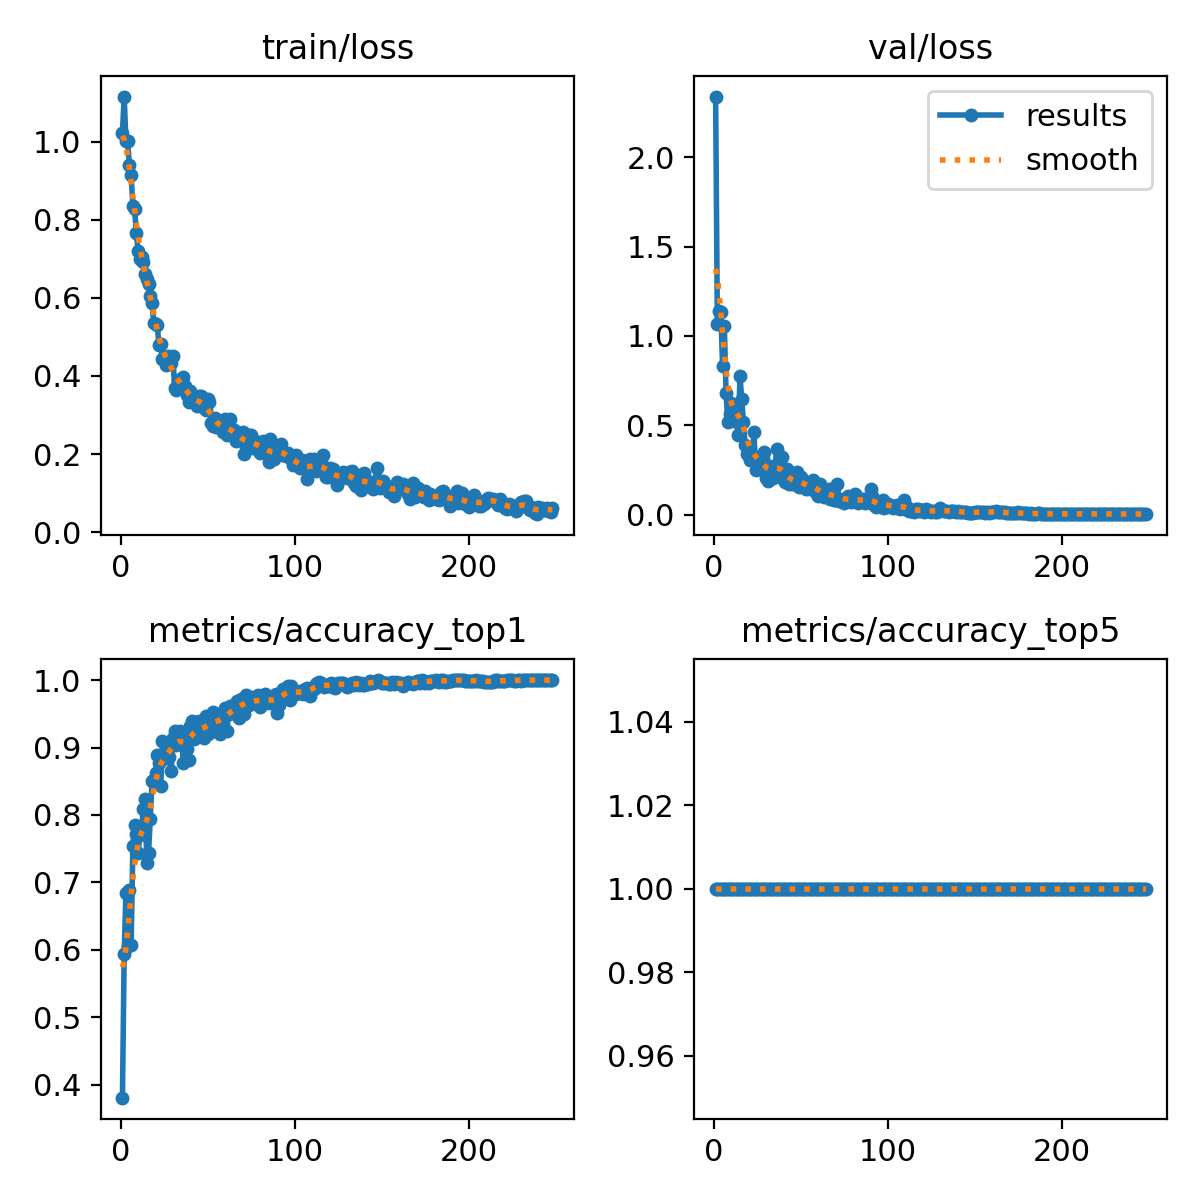

In [12]:
Image("/kaggle/working/runs/classify/cucumber_cls_model/results.png", width=600)

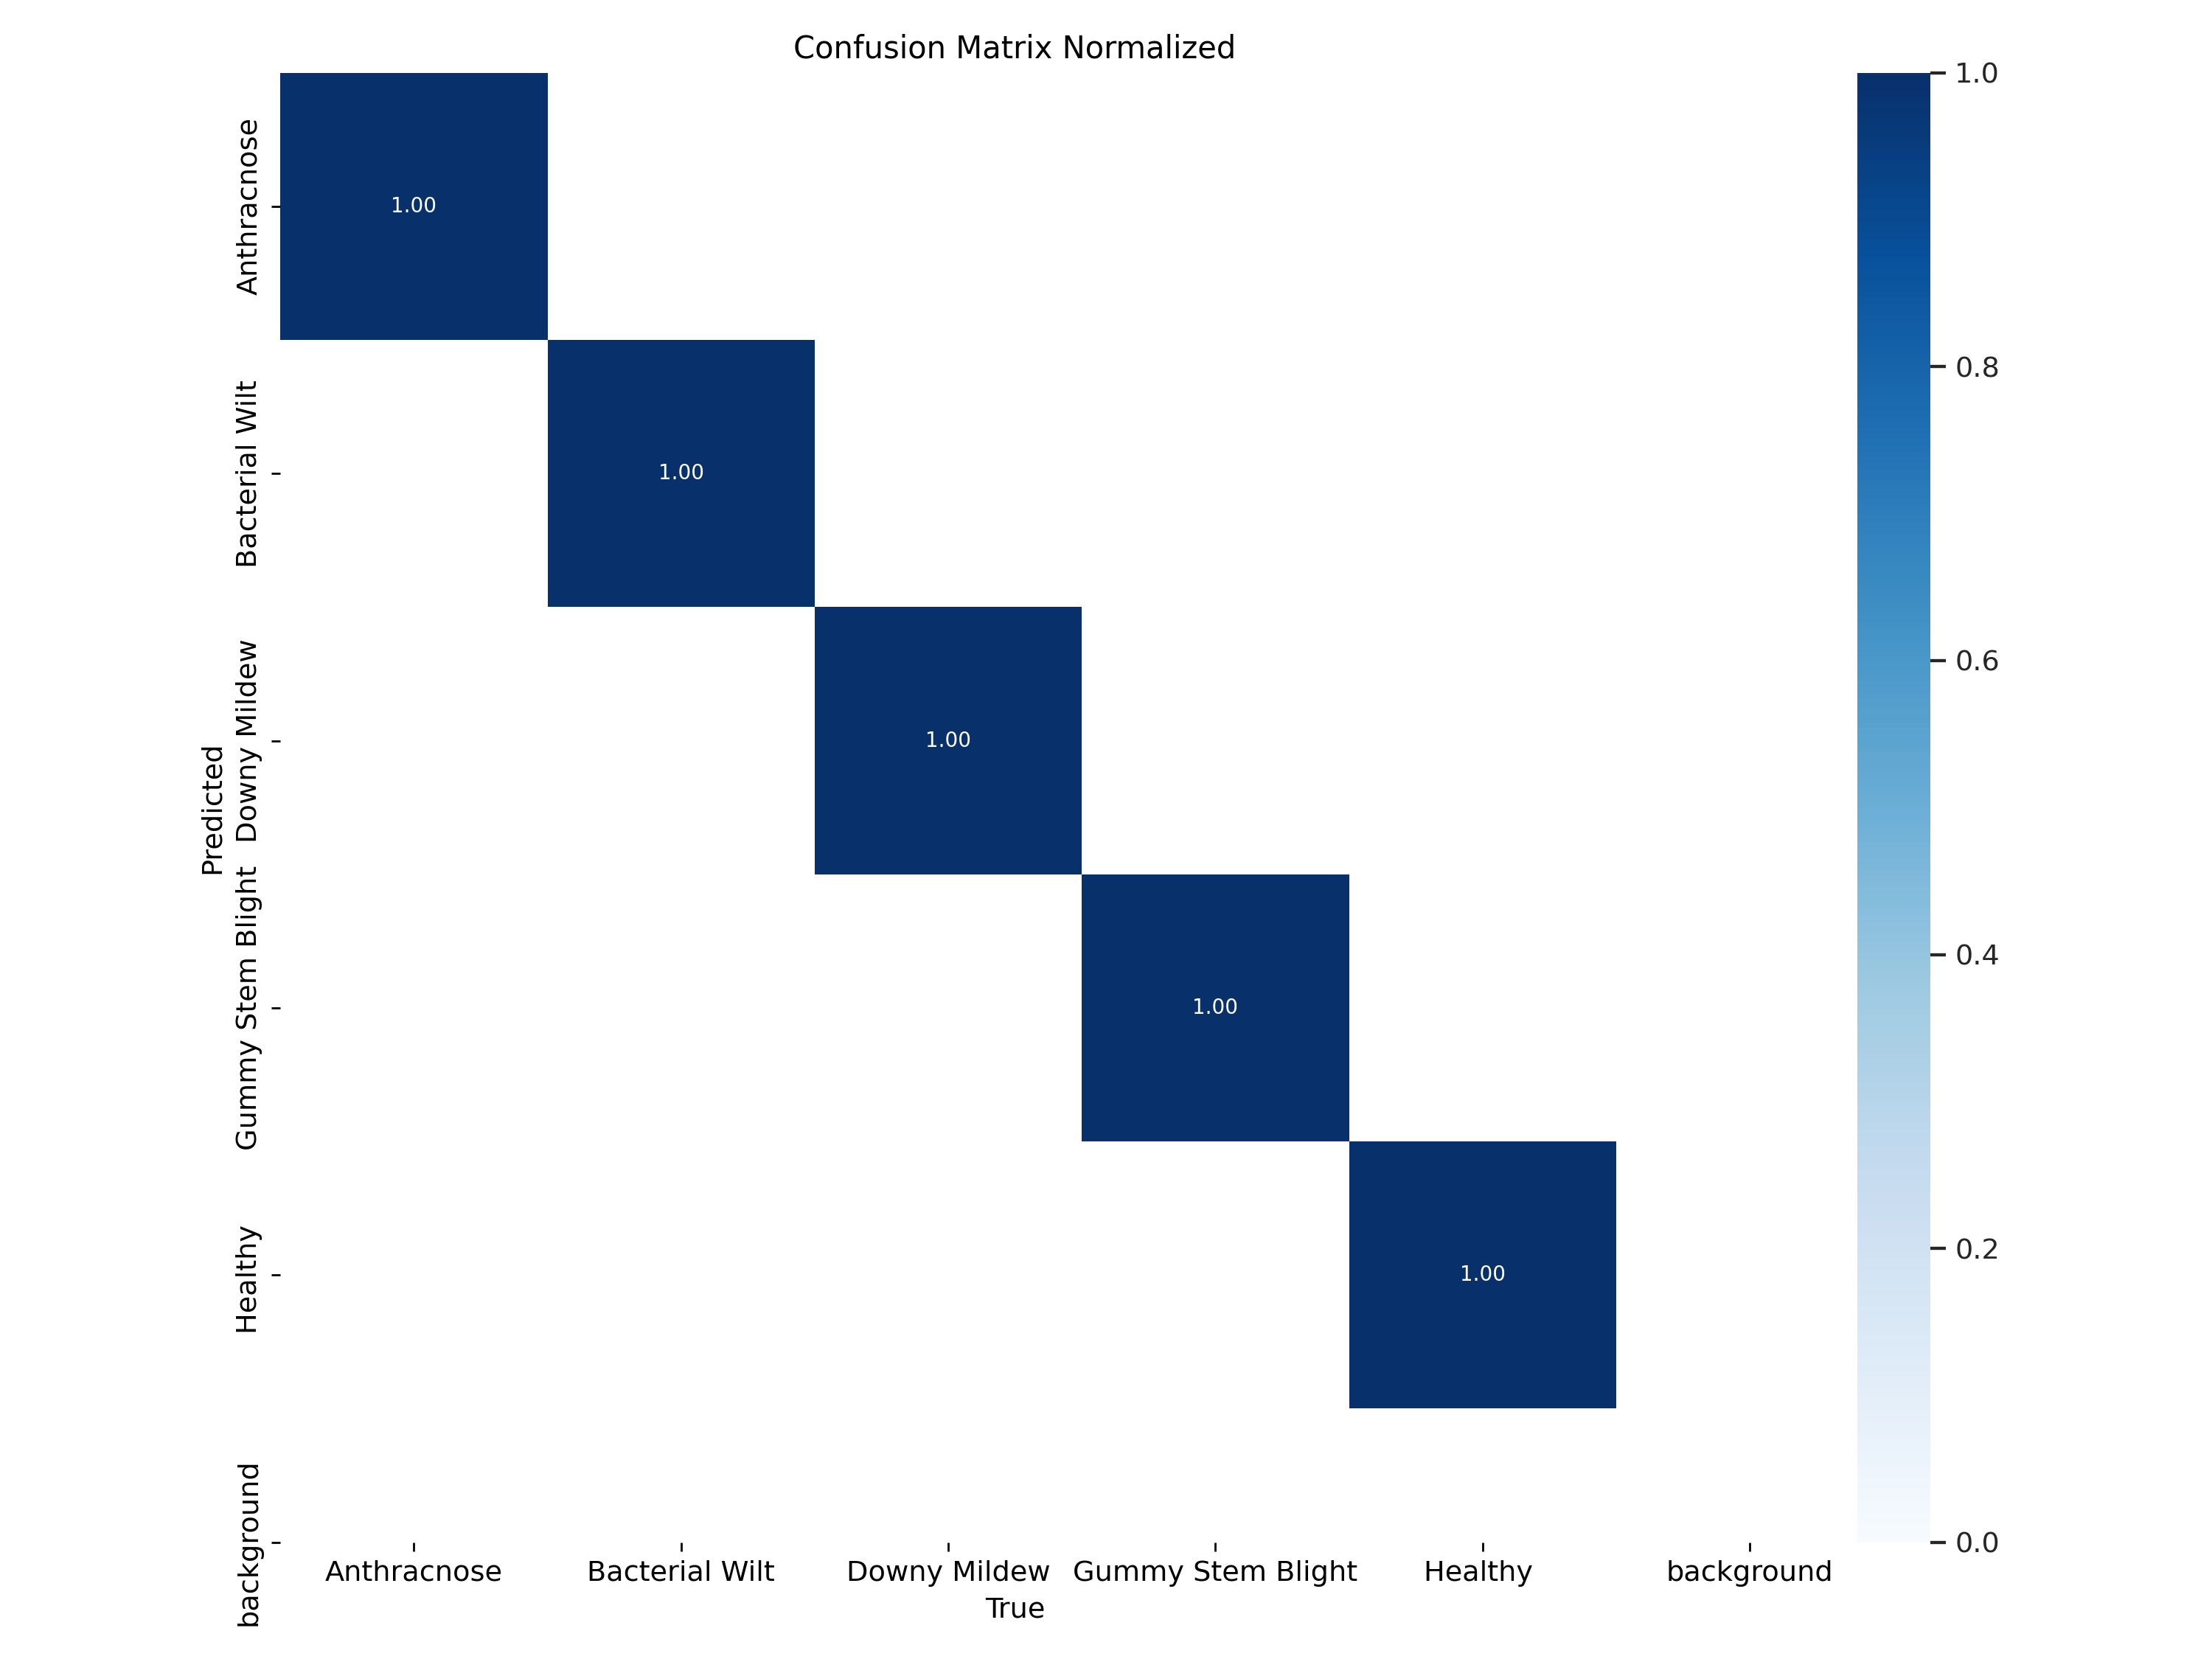

In [13]:
Image("/kaggle/working/runs/classify/cucumber_cls_model/confusion_matrix_normalized.png", width=600)